Nom : Amory

Prénom : William

Cursus : M1 BI-IPFB

# Analyse de données provenant d'UniProt

Dans la cellule de code ci-dessous, chargez les bibliothèques Python dont vous avez besoin :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Présentation du jeu de données

Le fichier `proteins_1.tsv` est un fichier au format TSV contenant, pour plusieurs milliers de protéines, des informations provenant d'UniProt.

Les colonnes de ce fichier sont :

- `Entry` : identifiant de la protéine.
- `Entry_name` : nom de la proténe.
- `Length` : taille de la protéine, c'est-à-dire le nombre de résidus.
- `Mass` : masse de la protéine, en Da.
- `Annotation_score` : qualité des annotations disponibles pour la protéine. Le score est compris entre 1 et 5. Plus le score est élevé, plus les annotations sont de bonne qualité.
- `Organism` : organisme de la protéine.
- `Class` : catégorie de la protéine.

## Chargement du jeu de données

Dans la cellule de code ci-dessous :

- chargez le jeu de données dans un *dataframe* pandas avec la colonne `Entry` comme index ;
- affichez les dimensions du dataframe ;
- et affichez les 5 premières lignes du dataframe obtenu.

In [3]:
dtf_prot = pd.read_csv("proteins_1.tsv", sep="\t", index_col="Entry")
print(dtf_prot.shape)
dtf_prot.head(5)

(7000, 6)


,Entry_name,Length,Mass,Annotation_score,Organism,Class
Entry,,,,,,
P93304,M490_ARATH,107,12125,1,thaliana,mitochondrial
P34897,GLYM_HUMAN,504,55993,5,human,mitochondrial
Q9FX35,PP117_ARATH,568,65679,2,thaliana,mitochondrial
Q9Z2B2,UCP5_MOUSE,325,36286,5,mouse,mitochondrial
P82914,RT15_HUMAN,257,29842,4,human,mitochondrial


Dans la cellule de code ci-dessous, déterminez le nombre de protéines pour chaque organisme

In [9]:
dtf_prot.groupby("Organism")

,Length,Mass,Annotation_score
Organism,,,
human,1361044,152213620,11298
mouse,1009728,112458499,7742
thaliana,647462,72221658,6076
yeast,315682,35748814,3504


Dans la cellule de code ci-dessous, déterminez la masse moyenne pour les protéines de chaque organisme.

In [11]:
dtf_prot.groupby("Organism")["Mass"].mean()

Organism
human       59855.926072
mouse       57938.433282
thaliana    42861.518101
yeast       43019.030084
Name: Mass, dtype: float64

Dans la cellule ci-dessous, affichez uniquement le nom et l'organisme des protéines Q12387, P47045 et Q12036.

In [13]:
dtf_prot.loc[["Q12387", "P47045", "Q12036"], ["Entry_name", "Organism"]]

,Entry_name,Organism
Entry,,
Q12387,NAA25_YEAST,yeast
P47045,TIM54_YEAST,yeast
Q12036,PPT2_YEAST,yeast


Dans la cellule ci-dessous, affichez uniquement les noms des protéines de la levure (*yeast*) qui contiennent plus de 1500 résidus.

In [15]:
dtf_prot[(dtf_prot["Organism"] == "yeast") & (dtf_prot["Length"] > 1500)]

,Entry_name,Length,Mass,Annotation_score,Organism,Class
Entry,,,,,,
Q06179,FMP27_YEAST,2628,303479,2,yeast,mitochondrial
Q03280,TOM1_YEAST,3268,374185,5,yeast,ubiquitin
Q07963,UBR2_YEAST,1872,216778,5,yeast,ubiquitin
P19812,UBR1_YEAST,1950,224838,5,yeast,ubiquitin
Q05022,RRP5_YEAST,1729,193134,5,yeast,ribosomal
P34241,URB1_YEAST,1764,203287,4,yeast,ribosomal
Q04781,LTN1_YEAST,1562,180186,5,yeast,ubiquitin


Dans le reste de l'énoncé, vous ne considérerez que les protéines qui possèdent un score d'annotation supérieur ou égale à 3.

Dans la cellule ci-dessous :
- Modifiez votre dataframe pour qu'il ne contienne que les protéines pour lesquelles le score d'annotation est supérieur ou égale à 3.
- Affichez les nouvelles dimensions du dataframe.

In [16]:
dtf_annot = dtf_prot[dtf_prot["Annotation_score"] >= 3]
dtf_annot.shape

(6212, 6)

Dans la cellule ci-dessous, représentez graphiquement sous la forme d'un nuage de points la masse en fonction de la taille des protéines de l'organisme *thaliana*.

Vous ajouterez un titre pour le graphique et des étiquettes pour les axes des abscisses et des ordonnées. La couleur des points sera orange.

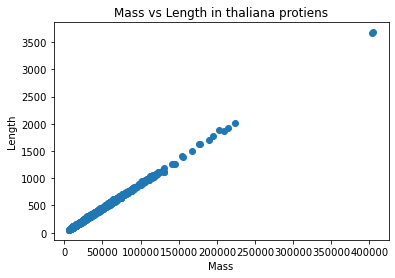

In [19]:
plt.scatter(dtf_annot[dtf_annot["Organism"] == "thaliana"]["Mass"],
            dtf_annot[dtf_annot["Organism"] == "thaliana"]["Length"])
plt.title("Mass vs Length in thaliana protiens")
plt.xlabel("Mass")
plt.ylabel("Length");

Dans la cellule ci-dessous, représentez graphiquement sous la forme d'un diagramme en bâtons le score moyen des annotations pour les différents organismes.

Vous ajouterez un titre pour le graphique et des étiquettes pour les axes des abscisses et des ordonnées.
La couleur des barres sera rouge.

In [36]:
dtf_annot.groupby("Organism")["Annotation_score"].mean()

Organism
human       4.595745
mouse       4.286474
thaliana    4.065672
yeast       4.374680
Name: Annotation_score, dtype: float64

<BarContainer object of 4 artists>

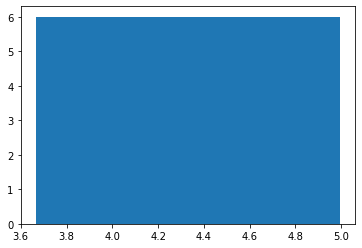

In [53]:
plt.bar(dtf_annot.groupby("Organism")["Annotation_score"].mean(), 6)